<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** A neuron takes inputs, multiplies them by their weights, sums them all up, then applies the activation function to this the weighted sum to determine whether the passed information should move onto the next stage. The neuron with greatest/most "signal" in a layer, gets to move forward.

- **Input Layer:** The first layer of a neural network. Takes in raw data (from the outside world or the output of other neurons) and feeds it into the rest of the network. No computations are performed in the input nodes.

- **Hidden Layer:** The layer(s) inbetween the input and output nodes, which does not see anything outside of it. Computationally intensive.

- **Output Layer:** The last layer of a neural network. This is where the results from a classification/regression emerge. This is the layer where the outputs/predictions are returned to.

- **Activation:** Is the process by which a neuron decides whether it should fire a signal (or not). Activation occurs by transforming a weighted sum + bias of inputs using activation functions (such as sigmoid, relu, etc) in order to introduce non-linearity into the output of a neuron.

- **Backpropagation:** (of errors). The process of calculating "gradients", which are vector representations of the derivative for the expected activated output. AFTER backpropagation, gradient descent occurs, where these calculated gradients are used to reduce J(theta) == error, in other words, these gradients are taken back into the hidden layers of the network and assign 'blame' for error. This will update the weights as the network runs iteratively to steer towards minimal error.


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [102]:
import pandas as pd
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [103]:
print(candy.shape)
candy.head()

(10000, 3)


,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [104]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values.reshape(-1,1)
X.shape, y.shape

((10000, 2), (10000, 1))

In [105]:
(x_train, x_test), (y_train, y_test) = (X[:8000, :], X[8000:, :]), (y[:8000, :], y[8000:, :])
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000, 1), (2000, 1))

In [106]:
##### Your Code Here #####
import numpy as np

def sigmoid(x):
    ''' A function that takes 1 parameter, x, and returns the sigmoid calculation of it'''
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    ''' A function that takes 1 parameter, x, and returns the sigmoid derivative of it'''
    sx = sigmoid(x)
    return sx * (1-sx)

def perceptron(inputs, outputs, num_passes):
    ''' A function that runs a simple neural network: A Perceptron.
        Takes in inputs, outputs to search for and the number of passes to learn from.'''
    
    ''' Assigning random weights to our inputs'''
    weights = 2 * np.random.random((len(inputs.T), 1)) - 1
    
    for iteration in range(num_passes):
        ''' Calculating the dot product of the inputs times the weights '''
        weighted_sum = np.dot(inputs, weights)
    
        ''' Output the activated value for the end of 1 training epoch '''
        activated_output = sigmoid(weighted_sum)
    
        ''' Taking the difference between Output and the True values to calculate error '''
        error = outputs - activated_output
    
        ''' Gradient descent/backprop - magic!'''
        adjusted = error * sigmoid_derivative(activated_output)
    
        ''' Updating the weights after each iteration'''
        weights += np.dot(inputs.T, adjusted)
    
        print(iteration)
        print('Weights after training: \n', weights, '\n')
        print('Outputs After the Training: \n', activated_output, '\n')
        
    return

In [107]:
perceptron(x_train, y_train, 3)
# it looks like the outputs get stuck at 0.5 for the first iteration; then they shift to essentially 0 and then
# in the third iteration they shift to 1.

0
Weights after training: 
 [[-242.50573146]
 [-232.79411957]] 

Outputs After the Training: 
 [[0.70831385]
 [0.72779182]
 [0.70831385]
 ...
 [0.5       ]
 [0.72779182]
 [0.86653425]] 

1
Weights after training: 
 [[256.24426854]
 [267.20588043]] 

Outputs After the Training: 
 [[7.92133626e-102]
 [4.79842814e-106]
 [7.92133626e-102]
 ...
 [5.00000000e-001]
 [4.79842814e-106]
 [3.80099628e-207]] 

2
Weights after training: 
 [[-136.97959795]
 [-125.62476219]] 

Outputs After the Training: 
 [[1. ]
 [1. ]
 [1. ]
 ...
 [0.5]
 [1. ]
 [1. ]] 



In [108]:
class Perceptron():
    
    def __init__(self, input_dim=2, output_dim=1, rate=0.01, n_iter=10):
        '''
        Class Parameters
        -----------------------------------------
        Input and Output dimensions (input_dim & output_dim): Int
        Learning rate (rate): float
        Number of Iterations(n_iter):Int
        Weight (weight): random floats using Numpy
        Bias (bias): a column of 1s to offset instances where all values in a row are 0
        Loss (loss): an empty list to store the nudges as the network goes through gradient descent process.
        '''
        self.rate = rate
        self.n_iter = n_iter
        self.weight = np.random.randn(input_dim, output_dim)
        self.bias = np.ones(output_dim)
        self.loss = [ ]
        pass
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1-sx)
    
    def affine_transform_forward(self, x, weight, bias):
        '''
        Will transform the input matrix by multiplying it by the weight and adding bias.
        Values will be stored in a cache to be passed to other functions within the class
        (i.e. affine_transform_backward).
        '''
        scores = x.dot(weight) + bias
        cache = (x, weight, bias)
        return scores, cache
    
    def affine_transform_backward(self, dout, cache):
        '''
        Will take derivatives for expected outputs back into the hidden layer of the network and assign
        'blame' for error. This will update the weights as the network runs iteratively to steer towards
        minimal error. Note, in a classification of NAND gates, 1s should have outputs approaching 99% (.99)
        and 0s should have outputs approaching 0% (0.00123)
        '''
        x, weight, bias = cache
        dx = dout.dot(weight.T)
        dweight = x.reshape(-1,1).dot(dout.reshape(-1,1))
        dbias = np.sum(dout, axis=0)
        return dx, dweight, dbias
    
    
    def fit(self, x, y):
        '''
        For every iteration designated as n_iter, the fit process will proceed as follows:
        1. Forward Propagation, 2. Scoring, 3. Backward Propagation and 4. Gradient Descent
        as weights and bias are iteratively 'nudged' with their derivatives and move towards
        minimum error as per Gradient Descent.
        '''

        for i in range(self.n_iter):
        
            for j in range(x.shape[0]):
            
                ''' Forward Propagation '''
                scores, cache = self.affine_transform_forward(x[j], self.weight, self.bias)
            
                ''' Scoring '''
                out = self.__sigmoid(scores)
                loss = y[j] - out.reshape(-1,)
                self.loss.append(loss)
            
                ''' Backward Propagation '''
                dout = loss * self.__sigmoid_derivative(out)
                _, dweight, dbias = self.affine_transform_backward(dout.reshape(-1,), cache)
            
                ''' Gradient Descent, iteratively updating each pass '''
                self.weight += dweight
                self.bias += dbias
            
        pass


    def predict(self, x):
        '''Return class label after unit step'''
        return self.__sigmoid(self.affine_transform_forward(x, self.weight, self.bias)[0])

In [109]:
x_train.shape, y_train.shape

((8000, 2), (8000, 1))

In [110]:
candies = Perceptron(input_dim=2, output_dim=1, n_iter=100)

In [111]:
candies.fit(x_train, y_train)

In [112]:
#PREDICTIONS
y_pred = candies.predict(x_test)
y_pred.shape

(2000, 1)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.round(y_pred))
# yep, in our simple perceptron model our accuracy score is approximately 50.6%
# We're not be able to achieve more than ~50% with the simple perceptron,
# because we need to introduce bias into our model.

0.506

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [52]:
class NeuralNetwork: 
    def __init__(self):
        # Set-up Architecture 
        self.inputs = 2
        self.hiddenNodes = 1
        self.outputNodes = 1
        
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes) #2x1
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes) #1x1
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        #Weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Acivations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [53]:
import numpy as np

nn = NeuralNetwork()

for i in range(50):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x_train)
        print('Actual Output: \n', y_train)
        print('Predicted Output: \n', str(nn.feed_forward(x_train)))
        print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(x_train)))))
    nn.train(x_train,y_train)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 0]
 [1 0]
 [1 1]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Predicted Output: 
 [[0.59246087]
 [0.57044209]
 [0.59246087]
 ...
 [0.55253142]
 [0.57044209]
 [0.59800686]]
Loss: 
 0.2537046796823867
+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 0]
 [1 0]
 [1 1]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Predicted Output: 
 [[6.49912937e-40]
 [1.84985571e-41]
 [6.49912937e-40]
 ...
 [4.29938060e-21]
 [1.84985571e-41]
 [1.84852211e-41]]
Loss: 
 0.5
+---------EPOCH 3---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 0]
 [1 0]
 [1 1]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Predicted Output: 
 [[6.49912937e-40]
 [1.84985571e-41]
 [6.49912937e-40]
 ...
 [4.29938060e-21]
 [1.84985571e-41]
 [1.84852211e-41]]
Loss: 
 0.5
+---------EPOCH 4---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 0]
 [1 0]
 [1 1]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Predicted Output: 


P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0


In [68]:
# split data into X_train and y_train
X_train = df.loc[:,df.columns != 'target'].values
y_train = df.loc[:, df.columns == 'target'].values

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [70]:
# taking a look at our training data
X_train

array([[ 0.40075247,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 1.17277425, -1.46841752,  1.00257707, ...,  0.97635214,
         0.26508221, -0.51292188],
       [ 0.40075247,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.39335191,  0.68100522, -0.93851463, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [ 2.38595135, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-1.25357993,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188]])

In [71]:
X_train.shape, y_train.shape

((303, 13), (303, 1))

In [73]:
#y_train

In [83]:
#Baseline Model
import numpy as np
from tensorflow import keras
from keras import backend
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Instantiate our model
model = Sequential()
# Add a Dense layer where all the nodes are connected between layers
# ReLU is best initial activation functions
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
# sigmoid is best activation function for output layer in binary classification problems
model.add(Dense(1, activation='sigmoid')) 
# Add a Compile method; which is how we want to train/teach the dataset
# binary_crossentropy is best loss function for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print model summary
print(model.summary())
# Fit the model using training data; use 10% of data for cross validation
history = model.fit(X_train, y_train, epochs=5, validation_split=0.10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_37 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_38 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________
None
Train on 272 samples, validate on 31 samples
Epoch 1/5
272/272 [==============================] - 1s 2ms/sample - loss: 0.7071 - accuracy: 0.5368 - val_loss: 0.6855 - val_accuracy: 0.5484
Epoch 2/5
272/272 [==============================] - 0s 109us

In [85]:
# initially when I ran this cell I obtained a 90% validation accuracy, which was very good, but
# I just got lucky because after rerunnning the cell a couple times that validation accuracy decreased to 74%.

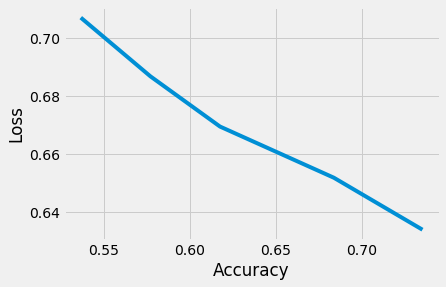

In [93]:
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
sns.lineplot(x=history.history['accuracy'], y=history.history['loss']);
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.show();
# as loss/error decreases or is minimized, the accuracy of our model increases.

In [94]:

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 202 samples
Epoch 1/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.9002 - accuracy: 0.3366
Epoch 2/20
202/202 [==============================] - 0s 177us/sample - loss: 0.8293 - accuracy: 0.3812
Epoch 3/20
202/202 [==============================] - 0s 166us/sample - loss: 0.7740 - accuracy: 0.4406
Epoch 4/20
202/202 [==============================] - 0s 170us/sample - loss: 0.7258 - accuracy: 0.5198
Epoch 5/20
202/202 [==============================] - 0s 174us/sample - loss: 0.6858 - accuracy: 0.5990
Epoch 6/20
202/202 [==============================] - 0s 170us/sample - loss: 0.6495 - accuracy: 0.6287
Epoch 7/20
202/202 [==============================] - 0s 173us/sample - loss: 0.6172 - accuracy: 0.6634
Epoch 8/20
202/202 [==============================] - 0s 184us/sample - loss: 0.5887 - accuracy: 0.7178
Epoch 9/20
202/202 [==============================] - 0s 149us/sample - loss: 0.5615 - accuracy: 0.7376
Epoch 10/20
202/202 [========================

In [100]:
# first I tuned batch_size
# batch size 20 was the best parameter with 80.9 accuracy - 
# this is already an improvement from our baseline model (74%)
# now i will tune other hyperparameters


# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [20],
              'epochs': [5, 10, 15, 20, 30, 40]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Train on 202 samples
Epoch 1/5
202/202 [==============================] - 0s 2ms/sample - loss: 0.6608 - accuracy: 0.6238
Epoch 2/5
202/202 [==============================] - 0s 105us/sample - loss: 0.6330 - accuracy: 0.6535
Epoch 3/5
202/202 [==============================] - 0s 85us/sample - loss: 0.6118 - accuracy: 0.6782
Epoch 4/5
202/202 [==============================] - 0s 84us/sample - loss: 0.5934 - accuracy: 0.6832
Epoch 5/5
202/202 [==============================] - 0s 87us/sample - loss: 0.5738 - accuracy: 0.7030
101/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
# 40 epochs gave us the best accuracy score of 83%!!